# The Sparks Foundation - Task 2

### Unsupervised ML - KMeans Clustering

In [1]:
__author__ = "Mrunal Salvi"
__email__ = "mrunalsalvi94@gmail.com"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df = df.drop('Id',1)

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Based on the unique species we can try and imagine the number of clusters

In [9]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df.Species.nunique()

3

## The K-means is a part of Flat/Partition type of clustering.

## There are many types of clustering, such as Heirarchial clustering which makes use of a dendrogram to determine the number of clusters before going ahead with Agglomerative or Divisive clustering.

### Elbow method for determination of number of clusters

- The K-Means algorithm is used for numerical data.
- The number of clusters need to be determined in order to group the data.
- K-means algorithm selects a cluster centroid for similar datapoints, and groups them together.
- Here each point in the vector space is assigned to a cluster represented by the cluster centroid. Then for each cluster the centroid is updated using the mean of all cluster members.
- This method is used for applications such as - population demographics, anomaly detection, market segmentation etc.

#### To tackle categorical data we make use of a variation called K-modes, we can use Fuzzy K-modes to deal with categorical data.

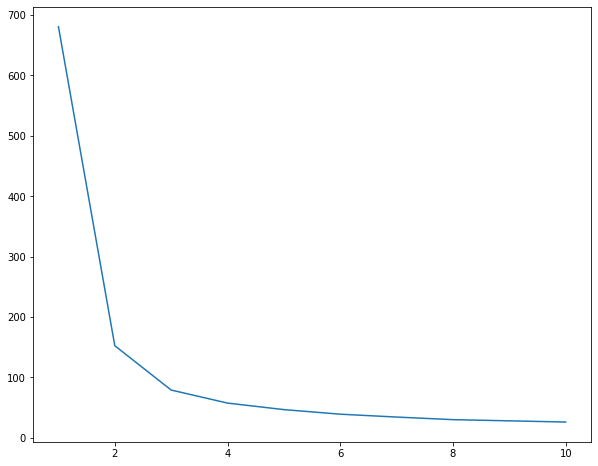

In [11]:
from sklearn.cluster import KMeans

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

dist = []

for i in range(1,11):
    km = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    dist.append(km.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(range(1,11),dist)

### The elbow bend is seen at 3, so the number of clusters is taken as 3.

In [12]:
#Plotting the clusters

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_pred = km.fit_predict(X)

In [13]:
centroids = km.cluster_centers_
centroids

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [14]:
wcss = km.inertia_
wcss

78.94084142614602

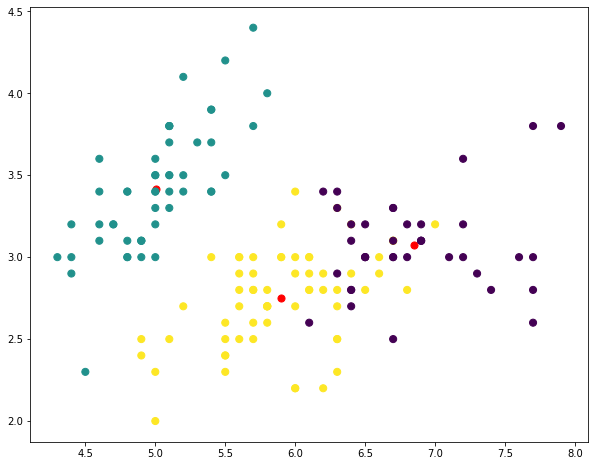

In [15]:
plt.figure(figsize=(10,8))

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s = 50, c = 'red')
plt.scatter(X[:,0],X[:,1],c=km.labels_, s=50, cmap = 'viridis')
plt.show()

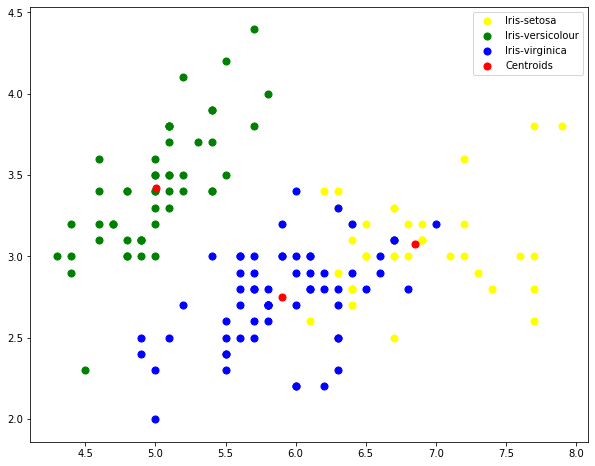

In [16]:
plt.figure(figsize=(10,8))

plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 50, c = 'yellow', label = 'Iris-setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 50, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 50, c = 'blue', label = 'Iris-virginica')

# Plotting the cluster centers
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')

plt.legend()

## An attempt with Heirarchial clustering and plotting a Dendrogram

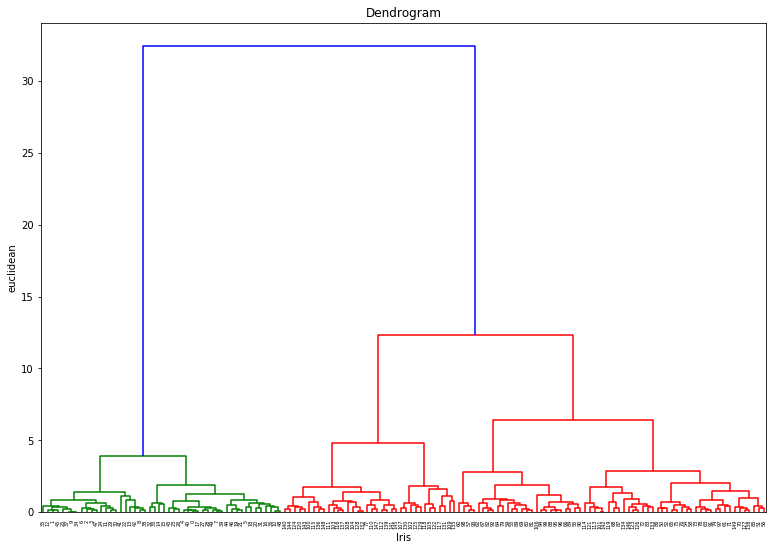

In [17]:
import scipy.cluster.hierarchy as sch

fig,ax_1 = plt.subplots(figsize=(13,9))

dend = sch.dendrogram(sch.linkage(X, method='ward'),leaf_rotation=90, ax=ax_1)

ax_1.set_title("Dendrogram")
ax_1.set_xlabel('Iris')
ax_1.set_ylabel('euclidean')
plt.show()

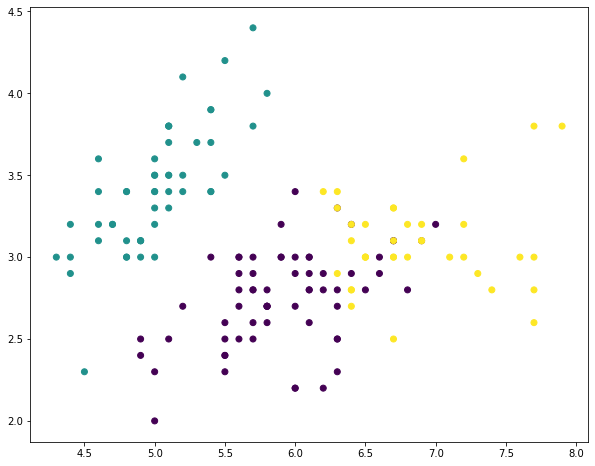

In [18]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

plt.figure(figsize=(10,8))

plt.scatter(X[:,0],X[:,1],c=cluster.labels_,cmap = 'viridis')
plt.show()